# NumPy Arrays: Computación Numérica Optimizada y Pandas: Análisis Exploratorio de Datos

## Unidad 3. Pre-procesamiento de datos con Pandas para la ejecución óptima del modelo

### 3.1. Pre-procesamiento de datos

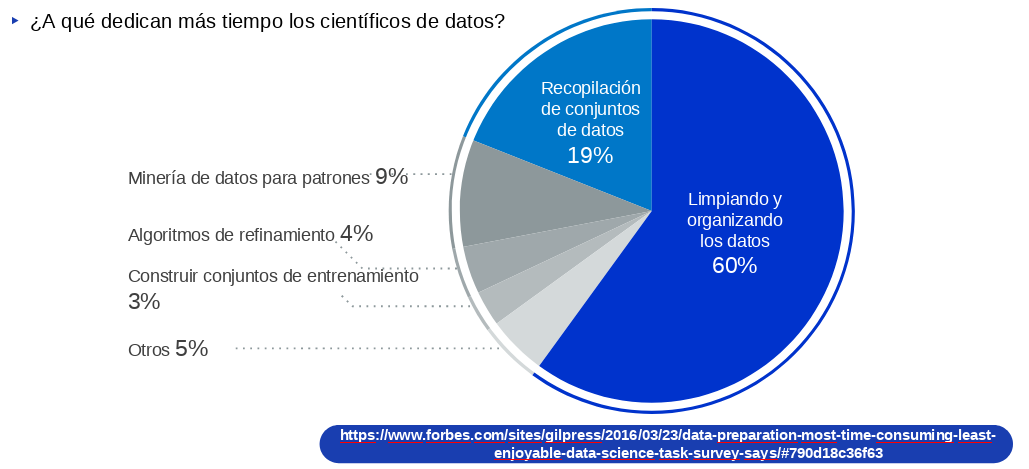

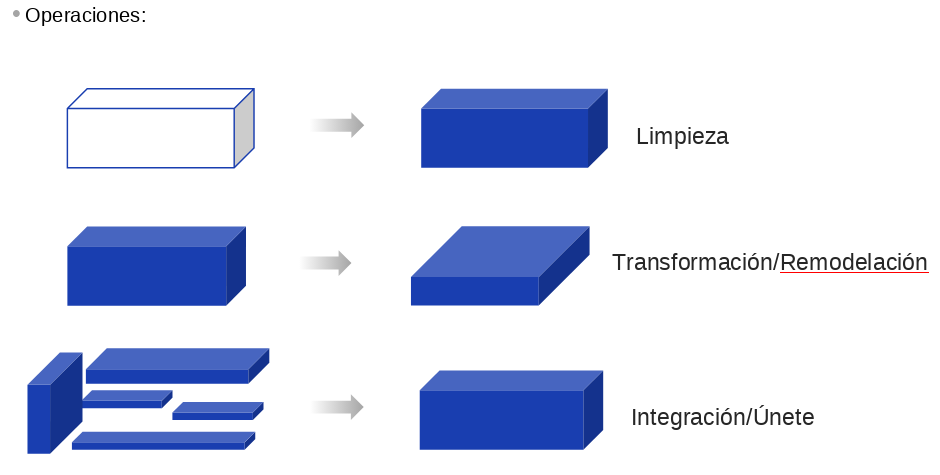

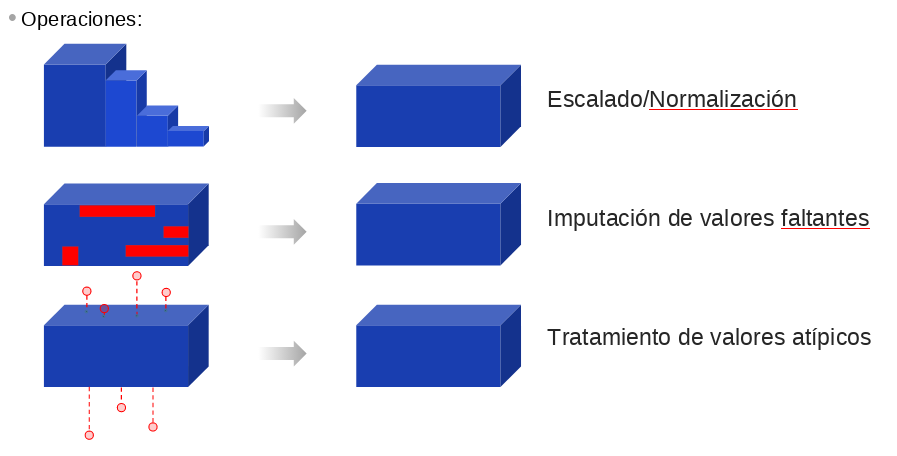

### 3.2. Identificación de las propiedades de los datos

#### Clasificación de datos -> Rendimiento computacional

- Escala continua
- Categóricos

### 3.3. Comprobación de datos faltantes

- Vf no relacionados con otras variables.
- c/var dist de prob específica -> estiman y reemplazan
- Sustituciones: media, mediana y moda.

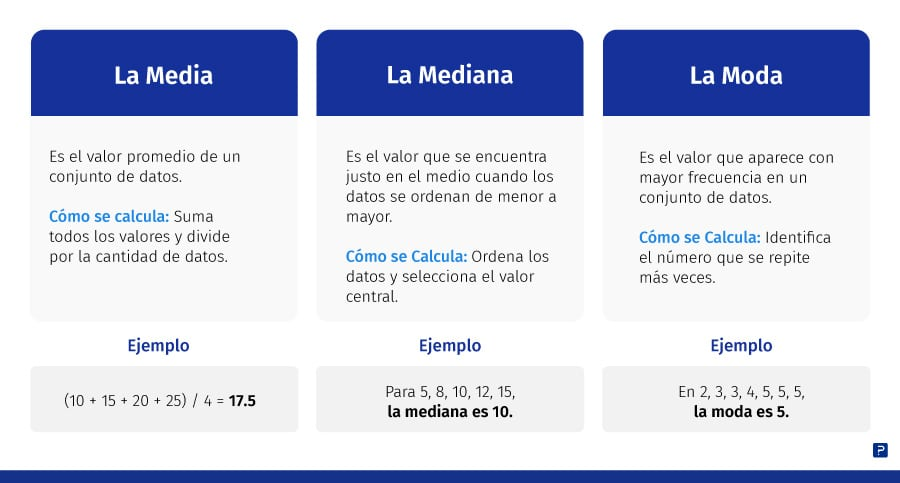

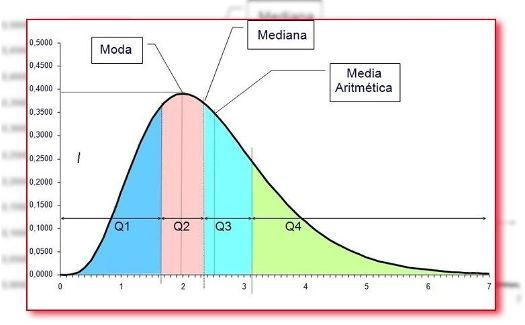

In [11]:
import seaborn as sns

df = sns.load_dataset('titanic')
nan_deck = df['deck'].value_counts(dropna=False)
print(nan_deck, '\n')
df.info()
df.head(10)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [8]:
print(df.head().isnull())
# print(df.head().notnull())

   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  


In [12]:
print(df.head(10).isnull().sum(axis=0))

survived       0
pclass         0
sex            0
age            1
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           7
embark_town    0
alive          0
alone          0
dtype: int64


In [15]:
# Eliminar los datos faltantes

print(df.columns)
df_th = df.dropna(axis=1, thresh=500) # Umbral
df_th.head()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [17]:
# Eliminar los datos faltantes
# 1er método

from IPython.core.display import HTML

dfd = df.head(10)
display(HTML(dfd.to_html()))
df_age = df.dropna(subset=['age'], how='any', axis=0)
df_age.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False


In [19]:
# 2do Método

mean_age = df['age'].mean()
print(mean_age)
df['age'].fillna(mean_age, inplace=True)
df.head(10)

29.699117647058763


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [23]:
# Eliminar los datos faltantes categóricos

df = sns.load_dataset('titanic')
print(df['embark_town'][825:830], '\n')

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object 



In [21]:
# 1er método

most_f = df['embark_town'].value_counts(dropna=True).idxmax()
print(most_f, '\n')

Southampton 



In [22]:
df['embark_town'].fillna(most_f, inplace=True)
print(df['embark_town'][825:830], '\n')

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object 



In [24]:
# 2do método

df['embark_town'].fillna(method='ffill', inplace=True)
print(df['embark_town'][825:830], '\n')

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
Name: embark_town, dtype: object 



### 3.4. Comprobación y procesamiento de datos duplicados

In [ ]:
import pandas as pd

df = pd.DataFrame({'c1':['a','a','b','a','b'],
                    'c2':[1,1,1,2,2],
                    'c3':[1,1,2,2,2]})

df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [ ]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [ ]:
df['c2'].duplicated()

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool

In [ ]:
df.drop_duplicates()

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [ ]:
df.drop_duplicates(subset=['c2','c3'])

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


### 3.5. Ingeniería de características de datos

Dia. 369

In [25]:
# df = pd.read_csv('auto-mpg.csv', header=None)

df = sns.load_dataset('mpg')
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
        'weight', 'acceleration', 'model year', 'origin', 'name']
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [27]:
mpg_to_kpl = 1.60934 / 3.78541
df['kpl'] = df['mpg'] * mpg_to_kpl
#df.head(5)
df['kpl'] = df['kpl'].round(2)
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,7.23


In [28]:
df['origin'].replace({'usa': 1, 'europe':2, 'japan':3}, inplace=True)
print(df['origin'].unique())
print(df['origin'].dtypes)

[1 3 2]
int64


In [31]:
df['origin'] = df['origin'].astype('float')
print(df['origin'].dtypes)
print(df['origin'].head())

float64
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: origin, dtype: float64


In [ ]:
print(df.dtypes, '\n')
df['horsepower'].unique() # ?

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin          float64
name             object
kpl             float64
dtype: object 



array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

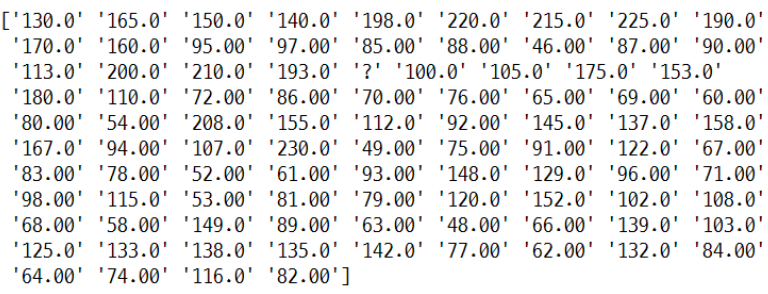

In [32]:
#df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)

In [36]:
import numpy as np

count, bin_dividers = np.histogram(df['horsepower'], bins=3) # intervalos
print (bin_dividers, count)

[ 46.         107.33333333 168.66666667 230.        ] [257 103  32]


In [41]:
import pandas as pd
bin_names=['Low output', 'Normal output', 'High output']

df['hp_bin'] = pd.cut(x=df['horsepower'],
                     bins=bin_dividers,
                     labels=bin_names,
                     include_lowest=True)

df[['horsepower','hp_bin']].head(15)

,horsepower,hp_bin
0,130.0,Normal output
1,165.0,Normal output
2,150.0,Normal output
3,150.0,Normal output
4,140.0,Normal output
5,198.0,High output
6,220.0,High output
7,215.0,High output
8,225.0,High output
9,190.0,High output


In [57]:
# var categóricas a ficticias

hp_dum = pd.get_dummies(df['hp_bin'])
hp_dum.head(15)

,Low output,Normal output,High output
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,False,True


In [42]:
df.horsepower.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [43]:
# NORMALIZANDO para que no se produzca una disminución del rendimiento
# debido a la diferencia en el tamaño relativo de los datos numéricos en la columna (cada variable).

df.horsepower = df.horsepower / df.horsepower.max()

print(df.horsepower.head(), '\n')
df.horsepower.describe()

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64 



count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64